In [54]:
# load data and consider two features (Economy..GDP.per.capita, Freedom) and the output to be estimated (Happiness.Score)
import csv

def loadData(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1  
              
    inputs =  [ [ 1 for _ in range(len(inputVariabNames) + 1)  ] for _ in range(len(data)) ]
    for j in range(len(inputVariabNames)):
        selectedVariable = dataNames.index(inputVariabNames[j])
        for i in range(len(data)): 
            inputs[i][j + 1] = float(data[i][selectedVariable])
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs


import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [[1, 1.61646318435669, 0.635422587394714], [1, 1.48238301277161, 0.626006722450256], [1, 1.480633020401, 0.627162635326385], [1, 1.56497955322266, 0.620070576667786], [1, 1.44357192516327, 0.617950856685638]]
out:  [7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


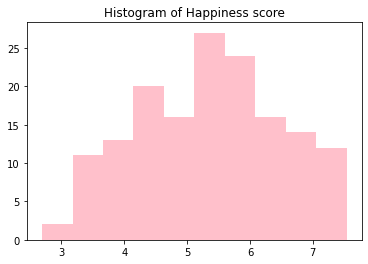

In [55]:
# see how the data looks (plot the histograms associated to input data - GDP feature, Freedom - and output data - happiness)

import matplotlib.pyplot as plt 


def plotDataHistogramOut(x, variableNames):
    n, bins, patches = plt.hist(x, 10, color = 'pink')
    plt.title('Histogram of ' + variableNames)
    plt.show()

plotDataHistogramOut(outputs, 'Happiness score')


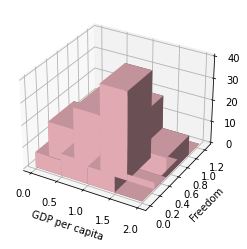

In [56]:
# see how the data looks (plot the histograms associated to input data - GDP feature, Freedom - and output data - happiness)

import matplotlib.pyplot as plt 
import numpy as np

def plotDataHistogramIn(xin, variableNames):
    fig = plt.figure()
    ax = plt.axes(projection = '3d')

    x = [row[1] for row in xin]
    y = [row[2] for row in xin]

    hist, xedges, yedges = np.histogram2d(x, y, bins = 4, range = [[0, 2], [0, 1]])
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color = 'pink')

    ax.set_xlabel('GDP per capita')
    ax.set_ylabel('Freedom')

    plt.show()

plotDataHistogramIn(inputs, ['capita GDP', 'freedom'])

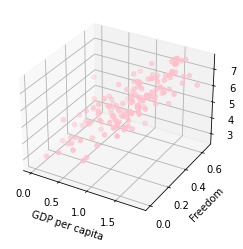

In [57]:
# check the liniarity
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
ax = plt.axes(projection = '3d')
x = [row[1] for row in inputs]
y = [row[2] for row in inputs]
z = outputs

ax.set_xlabel('GDP per capita')
ax.set_ylabel('Freedom')
ax.scatter3D(x, y, z, color = 'pink')




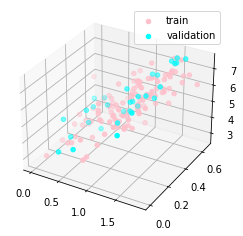

In [58]:
import numpy as np 

# Split the Data Into Training and Test Subsets
# In this step we will split our dataset into training and testing subsets (in proportion 80/20%).

# Training data set is used for learning the linear model. Testing dataset is used for validating of the model. All data from testing dataset will be new to model and we may check how accurate are model predictions.

np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

fig = plt.figure()
ax = plt.axes(projection = '3d')
x = [row[1] for row in trainInputs]
y = [row[2] for row in trainInputs]
z = trainOutputs
ax.scatter3D(x, y, z, color = 'pink', label = 'train')
x2 = [row[1] for row in validationInputs]
y2 = [row[2] for row in validationInputs]
z2 = validationOutputs
ax.scatter3D(x2, y2, z2, color = 'cyan', label = 'validation')
ax.legend()


In [59]:
# learning step: init and train a linear regression model y = f(x) = w0 * x0 + w1 * x1 + w2 * x2 (x0 = 1) 
# Prediction step: used the trained model to estimate the output for a new input


from sklearn import linear_model

# training data preparation (the sklearn linear model requires as input training data as noSamples x noFeatures array; in the current case, the input must be a matrix of len(trainInputs) lineas and three columns (the first column is 1)
xx = [[line[1], line[2]] for line in trainInputs]

# model initialisation
regressor = linear_model.LinearRegression()
# training the model by using the training inputs and known training outputs
regressor.fit(xx, trainOutputs)
# save the model parameters
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x1 + ', w2 ,' * x2' )

the learnt model: f(x) =  2.5283663171908195  +  1.8763387358812824  * x1 +  2.314748747503324  * x2


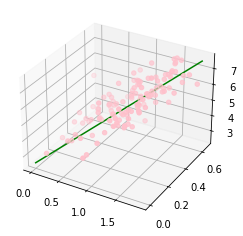

In [60]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# plot the learnt model
noOfPoints = 1000
x1line = []
x2line = []

x1 = [row[1] for row in trainInputs]
x2 = [row[2] for row in trainInputs]
y = trainOutputs
valx1 = min(x1)
valx2 = min(x2)
stepx1 = (max(x1) - min(x1)) / noOfPoints
stepx2 = (max(x2) - min(x2)) / noOfPoints 
for i in range(1, noOfPoints):
    x1line.append(valx1)
    valx1 += stepx1
    x2line.append(valx2)
    valx2 += stepx2
yline = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(x1line, x2line)]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x1, x2, y, color = 'pink')
ax.plot3D(x1line, x2line, yline, 'green')


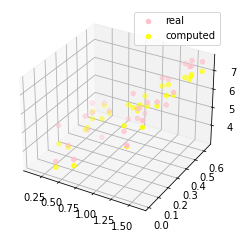

In [61]:
# use the trained model to predict new inputs

# makes predictions for test data
xx = [[line[1], line[2]] for line in validationInputs]
computedValidationOutputs = regressor.predict(xx)

# plot the computed outputs (see how far they are from the real outputs)

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

fig = plt.figure()
ax = plt.axes(projection = '3d')
x = [row[1] for row in validationInputs]
y = [row[2] for row in validationInputs]
z = validationOutputs
ax.scatter3D(x, y, z, color = 'pink', label = 'real')
z2 = computedValidationOutputs.tolist()
ax.scatter3D(x, y, z2, color = 'yellow', label = 'computed')
ax.legend()

In [62]:
#compute the differences between the predictions and real outputs
from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

prediction error (tool):   0.2778267434721004
